In [1]:
!echo "deb [signed-by=/usr/share/keyrings/cloud.google.gpg] http://packages.cloud.google.com/apt cloud-sdk main" | sudo tee -a /etc/apt/sources.list.d/google-cloud-sdk.list


deb [signed-by=/usr/share/keyrings/cloud.google.gpg] http://packages.cloud.google.com/apt cloud-sdk main


In [2]:
!sudo apt-get install apt-transport-https ca-certificates -y
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo tee

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ca-certificates is already the newest version (20240203~22.04.1).
The following NEW packages will be installed:
  apt-transport-https
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,510 B of archives.
After this operation, 170 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 apt-transport-https all 2.4.13 [1,510 B]
Fetched 1,510 B in 0s (7,126 B/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting pr

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
!sudo apt-get update && sudo apt-get install google-cloud-sdk -y

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://packages.cloud.google.com/apt cloud-sdk InRelease [1,618 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Err:3 http://packages.cloud.google.com/apt cloud-sdk InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY C0BA5CE6DC6315A3
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,068 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu 

In [5]:
# Declarar variables en Python
gcloud_user = 'fililoco'
dataset_file = 'competencia_01_baja.csv'
ganancia_acierto = 300000
costo_estimulo = 8000
mes_train = 202104
mes_test = 202106
modelos_path = 'modelos/'
db_path = 'db/'
semillas = '181001 181019 183041 199753 184007'
bucketname = 'bukofililoco'
#columnas que vamos a borrar





cuando alguna conexion pida password

Generating public/private rsa key pair.

Enter passphrase (empty for no passphrase):

Enter same passphrase again:

cliclkear ene sa frase y apretar enter

In [6]:
command_keygen = f"""ssh-keygen -t rsa -f ~/.ssh/id_rsa -C "{gcloud_user}@gmail.com" -N ''"""

In [7]:
!{command_keygen}

Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:W2m0HzLt/JI9x1Uo4cqqTsTWbUoTZqqor7Kxxxqt66s fililoco@gmail.com
The key's randomart image is:
+---[RSA 3072]----+
|                 |
|            .    |
|        + .. . . |
|     . = + +o . .|
|      = S.X.o.  .|
| . . + . Bo* .  .|
|o.o . . o.  +o ..|
|.*o  .  .   o.o o|
|EXo  .o.     ..o |
+----[SHA256]-----+


saco id de proyecto -click en My First proyect

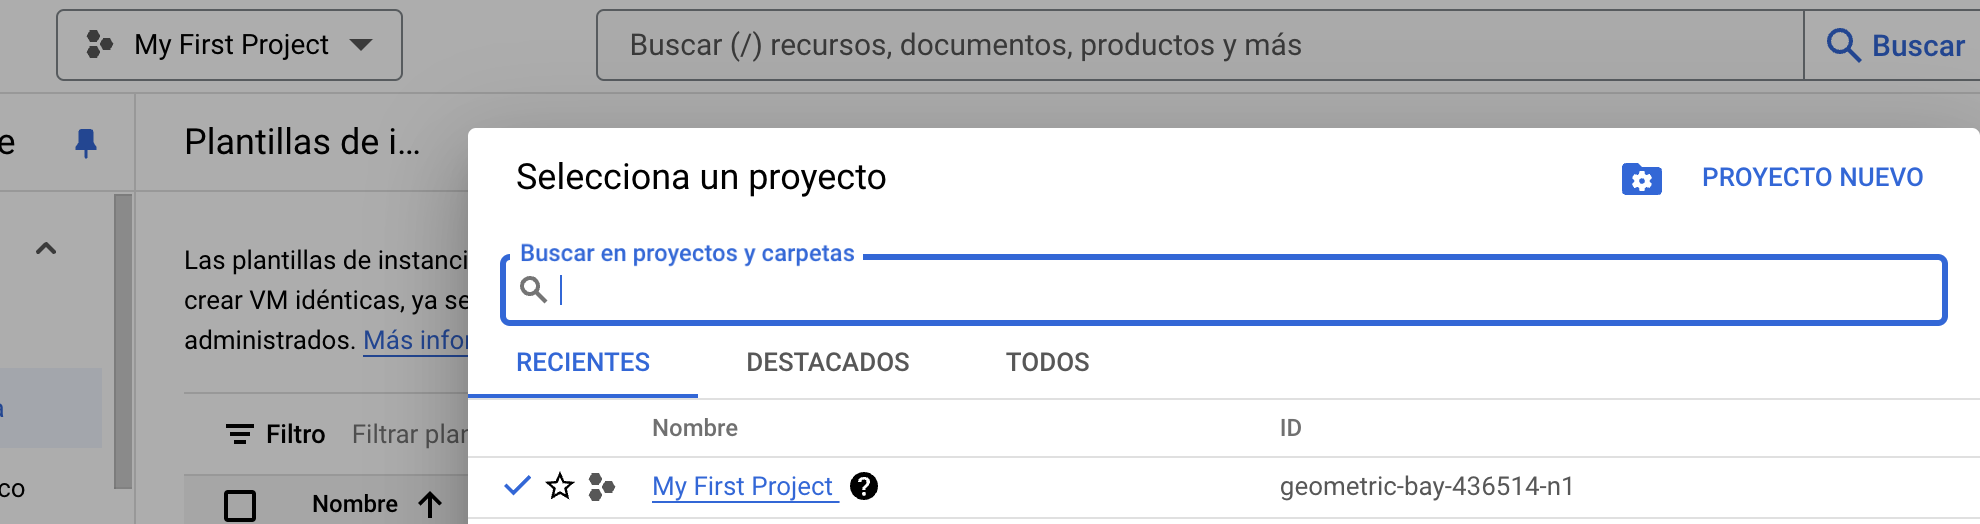

aca en geometric-bay-436514-n1 tienen que poner su id de proyecto


In [8]:
#cargo mi id y seteo el proyecto
gcloud_proyect_id = 'geometric-bay-436514-n1'
command_proyid = f"""gcloud config set project {gcloud_proyect_id}"""
!{command_proyid}

Updated property [core/project].


#crear una vm

In [9]:
#parametros para las virtuales

gcloud_vmname = 'z101'
gcloud_zone = 'us-west4-a'
#algunas virtuales que se pueden crear
#temp-08vcpu-512ram temp-08vcpu-032ram
gcloud_instancetemp = 'temp-08vcpu-032ram'

esto crea la vm, con el template elegido

In [10]:
command_createvm = f"""gcloud compute instances create {gcloud_vmname} \
    --source-instance-template={gcloud_instancetemp} \
    --zone={gcloud_zone}"""
!{command_createvm}

Created [https://www.googleapis.com/compute/v1/projects/geometric-bay-436514-n1/zones/us-west4-a/instances/z101].
 - Disk size: '256 GB' is larger than image size: '32 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.

NAME  ZONE        MACHINE_TYPE        PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
z101  us-west4-a  custom-8-32768-ext  true         10.182.0.13  34.125.56.241  RUNNING


agrega la clave publica de nuestro colab para poder coenctarnos al server

In [11]:
command_addkey = f"""
gcloud compute instances add-metadata {gcloud_vmname} \
  --zone {gcloud_zone} \
  --metadata "ssh-keys=$(whoami):$(cat ~/.ssh/id_rsa.pub)"
"""
!{command_addkey}

Updated [https://www.googleapis.com/compute/v1/projects/geometric-bay-436514-n1/zones/us-west4-a/instances/z101].


si queremos conectarnos por ssh a la virtual

In [ ]:
#para probar ssh
#!gcloud compute ssh z101 --zone us-west4-a

# copiar nueva base

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
command_copy_to_buket = f"""gsutil cp gs://open-courses/dmeyf2024-b725/competencia_02_crudo.csv.gz gs://{bucketname}/datasets/"""
!{command_copy_to_buket}

Copying gs://open-courses/dmeyf2024-b725/competencia_02_crudo.csv.gz [Content-Type=application/x-gzip]...
/ [1 files][683.4 MiB/683.4 MiB]                                                
Operation completed over 1 objects/683.4 MiB.                                    


In [14]:
command_gzip = f"""gcloud compute ssh {gcloud_user}@{gcloud_vmname} --zone {gcloud_zone} --command="gunzip /home/{gcloud_user}/buckets/b1/datasets/competencia_02_crudo.csv.gz /home/{gcloud_user}/buckets/b1/datasets/competencia_02_crudo.csv" """
!{command_gzip}

Generating public/private rsa key pair.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/google_compute_engine
Your public key has been saved in /root/.ssh/google_compute_engine.pub
The key fingerprint is:
SHA256:MyQ80+grT6hu2QtzcGo6sh0yHNnGfQM5exZgB9Cklr4 root@92802cc793ef
The key's randomart image is:
+---[RSA 3072]----+
|   .+=..         |
|    +o+o         |
|   + +*.o        |
|  * ..+=.        |
| o.=.o.=S        |
|. o+..+..o       |
|o.*E+ o          |
|o*o*.+           |
|+=+ ...          |
+----[SHA256]-----+
Updated [https://www.googleapis.com/compute/v1/projects/geometric-bay-436514-n1].
Waiting for SSH key to propagate.
bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
gzip: /home/fililoco/buckets/b1/datasets/competencia_02_crudo.csv already exists;	not overwritten
gzip: /home/fililoco/buckets/b1/datasets/compete

# ejemplo scripts

este es un ejemplo de como funcionaria la ejecucion remota de algun script desde el colab, lo bueno es que nos podemos traer los archivos y analizarlos aca en colab.

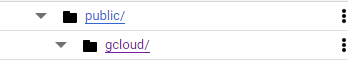

yo los estaba subiendo aca a los scripts, pero creo que seria mejor hacerlo con el git, en ese caso se tiene que modificar la ruta


Predict

In [15]:
#parametros predict
d_columns = ['cprestamos_personales', 'mprestamos_personales']
n_trials = 100
study_type = 'exp'
study_number = '130'
study_data = 'baja'
study_protocol = 'lgmb'
study_timeframe = '04-06'
study_aditional = 'extra_info'

In [16]:
command_prediction_01 = f"""
gcloud compute ssh {gcloud_user}@z101 --zone us-west4-a --command="
    cd /home/{gcloud_user}/buckets/b1/public/gcloud/ &&
    source /home/{gcloud_user}/.venv/bin/activate &&
    python3 handler_prediction_01.py --gcloud_user '{gcloud_user}' \
    --dataset_file '{dataset_file}' \
    --ganancia_acierto {ganancia_acierto} \
    --costo_estimulo {costo_estimulo} \
    --mes_train {mes_train} \
    --mes_test {mes_test} \
    --modelos_path '{modelos_path}' \
    --db_path '{db_path}' \
    --semillas {semillas} \
    --d_columns {' '.join([f"'{col}'" for col in d_columns])} \
    --n_trials {n_trials} \
    --study_type '{study_type}' \
    --study_number '{study_number}' \
    --study_data '{study_data}' \
    --study_protocol '{study_protocol}' \
    --study_timeframe '{study_timeframe}' \
    --study_aditional '{study_aditional}'
"
"""

In [ ]:
!{command_prediction_01}

aca te bajas el archivo a cloud lo bajas y lo subis a kaggle

In [ ]:
command_cp_exp = f"""gsutil cp gs://{bucketname}/public/gcloud/exp/K107_001 /content/"""
!{command_cp_exp}

esto es para apagar la virtual

In [ ]:
#estuvo todo muy lindo.. pero.. borramos la virtual
command_shutdown_vm = f"""gcloud compute instances delete {gcloud_vmname} --zone={gcloud_zone} --quiet"""
!{command_shutdown_vm}

#Optuna

In [ ]:
#parametros optuna
d_columns = ['cprestamos_personales', 'mprestamos_personales']
n_trials = 100
study_type = 'exp'
study_number = '130'
study_data = 'baja'
study_protocol = 'lgmb'
study_timeframe = '04-06'
study_aditional = 'extra_info'

In [ ]:
command_optuna = f"""
gcloud compute ssh {gcloud_user}@z101 --zone us-west4-a --command="
    cd /home/{gcloud_user}/buckets/b1/public/gcloud/ &&
    source /home/{gcloud_user}/.venv/bin/activate &&
    python3 handler_optuna.py --gcloud_user '{gcloud_user}' \
    --dataset_file '{dataset_file}' \
    --ganancia_acierto {ganancia_acierto} \
    --costo_estimulo {costo_estimulo} \
    --mes_train {mes_train} \
    --mes_test {mes_test} \
    --modelos_path '{modelos_path}' \
    --db_path '{db_path}' \
    --semillas {semillas} \
    --d_columns {' '.join([f"'{col}'" for col in d_columns])} \
    --n_trials {n_trials} \
    --study_type '{study_type}' \
    --study_number '{study_number}' \
    --study_data '{study_data}' \
    --study_protocol '{study_protocol}' \
    --study_timeframe '{study_timeframe}' \
    --study_aditional '{study_aditional}'
"
"""

In [ ]:
!{command_optuna}

bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/home/fililoco/.venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[I 2024-10-09 18:03:16,759] Using an existing study with name 'exp_130_lgmb_data-baja_optuna-130_timeframe04-06_extra-extra_info' instead of creating a new one.


In [ ]:
#estuvo todo muy lindo.. pero.. borramos la virtual
!gcloud compute instances delete z101 --zone=us-west4-a --quiet


Deleted [https://www.googleapis.com/compute/v1/projects/geometric-bay-436514-n1/zones/us-west4-a/instances/z101].


In [ ]:
#copiar el data de baja al bucket
#!gsutil cp /content/drive/MyDrive/dmeyf/competencia_01_baja.csv gs://bukoname/datasets

In [ ]:
!gsutil cp gs://bukoname/public/gcloud/optimization_lgbm.db /content/
#!gsutil cp gs://bukoname/public/gcloud/optimization_lgbm.db /content/drive/MyDrive/dmeyf/

Copying gs://bukofililoco/public/gcloud/optimization_lgbm.db...
/ [1 files][124.0 KiB/124.0 KiB]                                                
Operation completed over 1 objects/124.0 KiB.                                    


In [ ]:
%pip install optuna==3.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_slice, plot_contour

In [ ]:
storage_name = "sqlite:///" + '/content/' + "optimization_lgbm.db"
study_name = "exp_121_lgmb_data-baja_optuna-121_timeframe04-06_extra-extra_info"

#ii. Creo el estudio.
study = optuna.create_study(
    direction="maximize",
    study_name=study_name,
    storage=storage_name,
    load_if_exists=True,
)

[I 2024-10-09 14:26:44,953] Using an existing study with name 'exp_121_lgmb_data-baja_optuna-121_timeframe04-06_extra-extra_info' instead of creating a new one.


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
plot_param_importances(study)

In [ ]:
plot_slice(study)

In [ ]:
plot_contour(study, params=['num_leaves','min_data_in_leaf'] )